## Topic Modeling
Topic Modeling automatically discover the hidden themes from given documents. It is an unsupervised text analytics algorithm that is used for finding the group of words from the given document. These group of words represents a topic. There is a possibility that, a single document can associate with multiple themes.




## Import Libraries

In [3]:
import numpy as np
import pandas as pd

#!pip install urllib
import urllib.request as url 

#!pip install bs4
from bs4 import BeautifulSoup as bs

#!pip install wordcloud
from wordcloud import WordCloud

import re
import requests
import matplotlib.pyplot as plt
%matplotlib inline

import random
random.seed(123)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# !conda install -c conda-forge spacy
#!python -m spacy download en
#!pip install -U spacy
import spacy
nlp = spacy.load("en")


# import en_core_web_sm
# nlp = en_core_web_sm.load()

<img src='text_model_lifecycle.png'>

# Problem Statement: Determining the Latent Topics from blogs

## First Level Extraction
Extracting all **Authors** and their corresponding **blog links** at **level 1:**

https://indianbloggers.org/


## Second Level Extraction
For each blogger we will perfom a web scrapping from their respestive blog page and get links for other blogs of the same blogger:

## Third Level web scraping
In the third level we will extract the **blog contents** of each blog.  



In [6]:
html = "https://indianbloggers.org/"

def extract_web(link):
    html = url.urlopen(link).read()
    soup = bs(html, 'html.parser')
    d = {'title':[],'links':[]}
    for link in soup.find_all('a'):
         if len(link.text.strip()) > 1 and bool(re.match('http',link['href'])) and not bool(
            re.search('indianblogginers|indianbloggers|twitter|facebook|images|youtube|docs.google.com',link['href'])) and not bool(
            re.search('next page|about|store|meeting|google|contact|jan|feb|mar|apr|jun|jul|aug|sep|oct|nov|dec|january|february|march|april|may|june|july|august|september|october|november|december|f.a.q.|faq',link.text.lower())) :
            d['title'].append(link.text)
            d['links'].append(link['href'])

    blog_list = pd.DataFrame(d)
    return blog_list

blog_list = extract_web(html)

In [7]:
blog_list.head(15)

,title,links
0,Amit Agarwal,http://www.labnol.org/
1,Jyotsna Kamat,http://www.kamat.com/jyotsna/blog/
2,Amit Varma,http://www.indiauncut.com/
3,Sidin Vadukut,http://www.whatay.com/
4,Hawkeye,http://hawkeyeview.blogspot.in/
5,Neha,http://www.withinandwithout.com/
6,Rashmi Bansal,http://youthcurry.blogspot.in/
7,Dina Mehta,http://dinamehta.com/
8,Amit Agarwal,http://www.labnol.org/
9,Patrix,http://www.ipatrix.com/


In [8]:
blog_list.shape

(338, 2)

## Web scrapping of second level from the above table

In [9]:
blog_list_2nd = pd.DataFrame(columns=['Author','title', 'links'])

for rownum, blogs in blog_list[0:10].iterrows():
    
    try :
        temp = extract_web(blogs['links'])
        temp['Author'] = blogs['title']
        blog_list_2nd = pd.concat([blog_list_2nd, temp])
        
    except:
        pass

In [10]:
blog_list_2nd

,Author,links,title
0,Amit Agarwal,https://www.labnol.org/internet/101-useful-web...,Most Useful Websites
1,Amit Agarwal,https://www.labnol.org/internet/learn-coding-o...,Learn to Code
2,Amit Agarwal,https://dictation.io/,Voice Dictation
3,Amit Agarwal,https://www.labnol.org/software/essential-mac-...,The Best Mac Apps
4,Amit Agarwal,https://www.labnol.org/internet/sell-music-onl...,Sell your music online
5,Amit Agarwal,https://www.labnol.org/internet/personalized-m...,Mail Merge for Gmail
6,Amit Agarwal,https://www.labnol.org//internet/secure-your-w...,Secure your WiFi
7,Amit Agarwal,http://go.ctrlq.org/GoogleAutomation,PDF brochure
0,Hawkeye,http://hawkeyeview.blogspot.com/2018/09/chekka...,Chekka Chivandha Vaanam: What was the point of...
1,Hawkeye,https://plus.google.com/100757967372672523158,\nUnknown\n


# Level 3

# Scraping the Blogs

In [ ]:
%%time
data = {'Author':[], 'title':[], 'link':[], 'text':[]}

for rownum, row in blog_list_2nd.iterrows():
    author = row['Author']
    title = row['title']
    link = row['links']
    
    try:
        html = url.urlopen(link).read()
        soup = bs(html, 'html.parser')
        form_p_all = soup.select('p > form') # Selecting forms that are there inside the paragraphs
        for form in form_p_all:
            form.decompose()
            
        #Navigations in the side
        nav_div = soup.find_all('div', id=re.compile(".*[nav].$"))
        for nav in nav_div:
            nav.decompose()

        text_links = soup.select('p > a') # Selecting the links that are present inside the paragraph
        for text_link in text_links:
            text_link.replaceWith('')
            text_link.decompose()
    
        text_all = soup.find_all('p') #Selecting all the paragraphs
        text_data = ""
        for text in text_all:
            if not 'copyright' in text.text.lower():
                text_data = text_data +" " +text.text
    except:
        pass
    
    if text_data != "":
        print(text_data)
        data['Author'].append(author)
        data['title'].append(title)
        data['link'].append(link)
        data['text'].append(text_data)

 Here are the most useful websites on the Internet that will make you smarter, increase productivity and help you learn new skills. These incredibly useful websites solve at least one problem really well. And they all have cool URLs that are easy to memorize thus saving you a trip to Google. Know any useful website that is missing in the list? Please let me know via  or send an .  Send personalized emails to multiple people with a Google Sheet  Download Gmail messages and attachments to your Google Drive  Extract email addresses from Gmail messages and save in a Google Sheet  Receive files of any size from anyone in your Google Drive  Track prices of your favorite Amazon items in a Google Sheet  Create smart Twitter bots without writing a single line of code  We build bespoke solutions that use the capabilities and the features of Google Apps (G Suite) for automating business processes and driving business productivity. Our  are deployed in some of the biggest companies and universitie

 Mail Merge for Gmail lets you easily send personalized messages to one or more email recipients. You can write a single draft email in Gmail, specify the list of email recipients in a Google Spreadsheet and the Mail Merge program will send customized emails to all these addresses in one go. Mail Merge is a popular feature of Microsoft Outlook and, with the help of , we can easily perform mail merge in Gmail, Google Inbox, Google Apps and G Suite accounts as well.  is powerful and packed with useful features. You can insert different (unique)  for each recipient, the emails can be written in plain text or formatted in  and the  can be tracked so you’ll know if an email has been read. You can also schedule merges and send your emails later at your preferred date and hour. Watch this  to learn more.   To get started, install the Mail Merge add-on. You can either add it in your own Google Account or, if you are a Google Apps admin, you can install Mail Merge to all users in your G Suite d

#### Observations:

#### We still see some common lines that are part of text like
#### "india  google apps script  g suite apis", "Posted by Amit Varma"
#### "Essays and Op-Eds"

In [11]:
#Understanding the data
pd.DataFrame(data).head(4)

,Author,title,link,text
0,Amit Agarwal,Most Useful Websites,https://www.labnol.org/internet/101-useful-web...,Here are the most useful websites on the Inte...
1,Amit Agarwal,Learn to Code,https://www.labnol.org/internet/learn-coding-o...,The Learn to Code movement has picked up mome...
2,Amit Agarwal,Voice Dictation,https://dictation.io/,Use the magic of speech recognition to write ...
3,Amit Agarwal,The Best Mac Apps,https://www.labnol.org/software/essential-mac-...,Whether you are a new Mac user or seasoned ve...


#### Saving the webscraped data to text file (Contingency plan - Just in case the html page is not available to scrape ) 

In [3]:
data = pd.read_csv("Extracted_Blogs.csv", sep= ',')
data.head()

,Author,title,link,text
0,Amit Agarwal,Most Useful Websites,https://www.labnol.org/internet/101-useful-web...,Here are the most useful websites on the Inte...
1,Amit Agarwal,Learn to Code,https://www.labnol.org/internet/learn-coding-o...,The Learn to Code movement has picked up mome...
2,Amit Agarwal,Voice Dictation,https://dictation.io/,Use the magic of speech recognition to write ...
3,Amit Agarwal,The Best Mac Apps,https://www.labnol.org/software/essential-mac-...,Whether you are a new Mac user or seasoned ve...
4,Amit Agarwal,Sell your music online,https://www.labnol.org/internet/sell-music-onl...,It is now easier than ever before to sell you...


## Text Preprocessing Steps 

In [4]:
#Duplicating the original text extracted before proceeeding with preprocessing steps

import copy
print(type(data['text']))
original_data = copy.deepcopy(data)
print(data.keys())
print(original_data.keys())

<class 'pandas.core.series.Series'>
Index(['Author', 'title', 'link', 'text'], dtype='object')
Index(['Author', 'title', 'link', 'text'], dtype='object')


### Basic cleaning of text

### LowerCase all text

In [5]:
data['text'] = [text.strip().lower() for text in data['text']]
data['text'][:10]

0    here are the most useful websites on the inter...
1    the learn to code movement has picked up momen...
2    use the magic of speech recognition to write e...
3    whether you are a new mac user or seasoned vet...
4    it is now easier than ever before to sell your...
5    mail merge for gmail lets you easily send pers...
6    wireless networking (wi-fi) has made it so eas...
7    by category\n\n by date\n\n  my first book, my...
8    by category\n\n by date\n\n  deserves to be ca...
9    rave out is about books, films and music that ...
Name: text, dtype: object

## Defining the functions to perform basic steps like 

- **expanding contractions**
 
- **remove accented characters**

- **scrub words**

In [6]:
data['text'][1]

'the learn to code movement\xa0has\xa0picked up momentum worldwide and that is actually a good thing as even basic programming skills can have a major impact. if you can teach yourself how to write code, you gain a competitive edge over your peers, you can think more algorithmically and thus can tackle problems more efficiently. don’t just download the latest app, help redesign it. don’t just play on your phone, program it. — obama. there’s no reason why shouldn’t know the basics of coding. you can automate tasks, you can program your excel sheets, improve workflows, you can extract data from websites and accomplish so much more with code. you may not be in the business of writing software programs but knowing the basics of coding will help you communicate more effectively with developers. gone are the days when you had to enroll in expensive computer training classes as now exist a plethora of web-based\xa0courses that will help you learn programming at your own pace in the comfort of

In [7]:
contractions = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [8]:
def expand_contractions(text):
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
    return text

## Invoking the expand_contractions functions

In [9]:
data['text'] = [expand_contractions(re.sub('’', "'", text)) for text in data['text']]
data['text'][1]

'the learn to code movement\xa0has\xa0picked up momentum worldwide and that is actually a good thing as even basic programming skills can have a major impact. if you can teach yourself how to write code, you gain a competitive edge over your peers, you can think more algorithmically and thus can tackle problems more efficiently. do not just download the latest app, help redesign it. do not just play on your phone, program it. — obama. there is no reason why should not know the basics of coding. you can automate tasks, you can program your excel sheets, improve workflows, you can extract data from websites and accomplish so much more with code. you may not be in the business of writing software programs but knowing the basics of coding will help you communicate more effectively with developers. gone are the days when you had to enroll in expensive computer training classes as now exist a plethora of web-based\xa0courses that will help you learn programming at your own pace in the comfor

In [10]:
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #https://docs.python.org/2/library/unicodedata.html
    return text

In [11]:
data['text'][2]

'use the magic of speech recognition to write emails and documents in google chrome. dictation accurately transcribes your speech to text in real time. you can add paragraphs, punctuation marks, and even smileys using voice commands. dictation can recognize and transcribe popular languages including english, español, français, italiano, português, हिन्दी, தமிழ், اُردُو, বাংলা, ગુજરાતી, ಕನ್ನಡ, and more. see full list of . you can add new paragraphs, punctuation marks, smileys and other special characters using simple voice commands. for instance, say "new line" to move the cursor to the next list or say "smiling face" to insert :-) smiley. see list of supported . dictation uses google speech recognition to transcribe your spoken words into text. it stores the converted text in your browser locally and no data is uploaded anywhere. .  amit@labnol.org google chromewindows/mac/linuxinternet connection  here\'s a list of languages supported by speech recognition. afrikaans, bahasa indonesia

## Invoking the remove_accented_chars functions

In [12]:
data['text'] = [remove_accented_chars(text) for text in data['text']]
data['text'][2]

'use the magic of speech recognition to write emails and documents in google chrome. dictation accurately transcribes your speech to text in real time. you can add paragraphs, punctuation marks, and even smileys using voice commands. dictation can recognize and transcribe popular languages including english, espanol, francais, italiano, portugues, , , , , , , and more. see full list of . you can add new paragraphs, punctuation marks, smileys and other special characters using simple voice commands. for instance, say "new line" to move the cursor to the next list or say "smiling face" to insert :-) smiley. see list of supported . dictation uses google speech recognition to transcribe your spoken words into text. it stores the converted text in your browser locally and no data is uploaded anywhere. .  amit@labnol.org google chromewindows/mac/linuxinternet connection  here\'s a list of languages supported by speech recognition. afrikaans, bahasa indonesia, bahasa melayu, catala, cestina, 

In [13]:
def scrub_words(text):
    #Replace \xao characters in text
    text = re.sub('\xa0', ' ', text)
    
    #Replace non ascii / not words and digits
    text = re.sub("(\\W|\\d)",' ',text)
    
    #Replace new line characters and following text untill space
    text = re.sub('\n(\w*?)[\s]', '', text)
    
    #Remove html markup
    text = re.sub("<.*?>", ' ', text)
    
    #Remove extra spaces from the text
    text = re.sub("\s+", ' ', text)
    return text

## Invoking the above defined functions

In [14]:
data['text'] = [scrub_words(text) for text in data['text']]
data['text'][2]

'use the magic of speech recognition to write emails and documents in google chrome dictation accurately transcribes your speech to text in real time you can add paragraphs punctuation marks and even smileys using voice commands dictation can recognize and transcribe popular languages including english espanol francais italiano portugues and more see full list of you can add new paragraphs punctuation marks smileys and other special characters using simple voice commands for instance say new line to move the cursor to the next list or say smiling face to insert smiley see list of supported dictation uses google speech recognition to transcribe your spoken words into text it stores the converted text in your browser locally and no data is uploaded anywhere amit labnol org google chromewindows mac linuxinternet connection here s a list of languages supported by speech recognition afrikaans bahasa indonesia bahasa melayu catala cestina dansk deutsch english espanol euskara filipino franca

#### Spell Correction

### Checking the integrity of the data after initial preprocessing steps

In [15]:
print("Data Type: ", type(original_data['text']))
print("Data Type: ", type(data['text']))

print("Length of data: ", len(original_data['text']))
print("Length of data: ", len(data['text']))

print("Original data: \n", original_data['text'][0])
print("\n\n**************************************************************************\n\n")
print("Clean data: \n", data['text'][0])

Data Type:  <class 'pandas.core.series.Series'>
Data Type:  <class 'pandas.core.series.Series'>
Length of data:  685
Length of data:  685
Original data: 
  Here are the most useful websites on the Internet that will make you smarter, increase productivity and help you learn new skills. These incredibly useful websites solve at least one problem really well. And they all have cool URLs that are easy to memorize thus saving you a trip to Google. Know any useful website that is missing in the list? Please let me know via  or send an .  Send personalized emails to multiple people with a Google Sheet  Download Gmail messages and attachments to your Google Drive  Extract email addresses from Gmail messages and save in a Google Sheet  Receive files of any size from anyone in your Google Drive  Track prices of your favorite Amazon items in a Google Sheet  Create smart Twitter bots without writing a single line of code  We build bespoke solutions that use the capabilities and the features of Go

In [16]:
print("Original data: \n",original_data['text'][1])
print("\n\n**************************************************************************\n\n")
print("Clean data: \n",data['text'][1])

Original data: 
  The Learn to Code movement has picked up momentum worldwide and that is actually a good thing as even basic programming skills can have a major impact. If you can teach yourself how to write code, you gain a competitive edge over your peers, you can think more algorithmically and thus can tackle problems more efficiently. Don’t just download the latest app, help redesign it. Don’t just play on your phone, program it. — Obama. There’s no reason why shouldn’t know the basics of coding. You can automate tasks, you can program your Excel sheets, improve workflows, you can extract data from websites and accomplish so much more with code. You may not be in the business of writing software programs but knowing the basics of coding will help you communicate more effectively with developers. Gone are the days when you had to enroll in expensive computer training classes as now exist a plethora of web-based courses that will help you learn programming at your own pace in the co

#### Adding new column "word_count" which specifies the number of tokens in each document

In [17]:
data['word_count'] = [len(text.split(' ')) for text in data['text']]
pd.DataFrame(data['word_count']).describe()

,word_count
count,685.000000
mean,5053.792701
std,9539.212316
min,1.000000
25%,14.000000
50%,214.000000
75%,4449.000000
max,50571.000000


In [18]:
print(f"The total words in the 390th blog is {data['word_count'][390]}")
print(f"The 390th blog is: \n {data['text'][390]}")

The total words in the 390th blog is 74
The 390th blog is i am the essence of overconfidence i am speculation adventure the spirit of pursuit the stag howling for its winsome yet anonymous mate i am the love call of evolution the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees i am sex itself gentlemen i am life i am appetite thank you for sharing this this was a forgotten piece of my childhood 


#### Converting the dictionary to Dataframe 

Converting dictionary to dataframe as pandas provide better and readable subsetting options

In [19]:
data.keys()

Index(['Author', 'title', 'link', 'text', 'word_count'], dtype='object')

In [20]:
blogs_df = pd.DataFrame(data)
print("Shape: ",blogs_df.shape)
blogs_df.head(5)

Shape:  (685, 5)


,Author,title,link,text,word_count
0,Amit Agarwal,Most Useful Websites,https://www.labnol.org/internet/101-useful-web...,here are the most useful websites on the inter...,184
1,Amit Agarwal,Learn to Code,https://www.labnol.org/internet/learn-coding-o...,the learn to code movement has picked up momen...,483
2,Amit Agarwal,Voice Dictation,https://dictation.io/,use the magic of speech recognition to write e...,184
3,Amit Agarwal,The Best Mac Apps,https://www.labnol.org/software/essential-mac-...,whether you are a new mac user or seasoned vet...,260
4,Amit Agarwal,Sell your music online,https://www.labnol.org/internet/sell-music-onl...,it is now easier than ever before to sell your...,896


#### Removing all the blogs with words_count value less than first quartile (25%) of words_count attribute

In [21]:
## Getting the first quartile value
q1 = np.percentile(blogs_df.word_count, 25)
print(f"The first quartile value of words_count attribute is {q1}")

The first quartile value of words_count attribute is 14.0


In [22]:
blogs_df = blogs_df[blogs_df['word_count'] > q1]
print(f"The shape of trimmed blogs dataframe is {blogs_df.shape}")

The shape of trimmed blogs dataframe is (495, 5)


#### Converting dataframe back to dictionary

In [23]:
data = blogs_df.reset_index().to_dict(orient='list')
print(f"The keys in the dictionary are {data.keys()}")

The keys in the dictionary are dict_keys(['index', 'Author', 'title', 'link', 'text', 'word_count'])


In [24]:
print(data['text'][5])

mail merge for gmail lets you easily send personalized messages to one or more email recipients you can write a single draft email in gmail specify the list of email recipients in a google spreadsheet and the mail merge program will send customized emails to all these addresses in one go mail merge is a popular feature of microsoft outlook and with the help of we can easily perform mail merge in gmail google inbox google apps and g suite accounts as well is powerful and packed with useful features you can insert different unique for each recipient the emails can be written in plain text or formatted in and the can be tracked so you will know if an email has been read you can also schedule merges and send your emails later at your preferred date and hour watch this to learn more to get started install the mail merge add on you can either add it in your own google account or if you are a google apps admin you can install mail merge to all users in your g suite domain after the add on is 

In [25]:
type(data['text'])

list

## Stopwords, stemming, and tokenizing

In [26]:
## load spacy's English stopwords as variable called 'stopwords'

stopwords = spacy.lang.en.stop_words.STOP_WORDS
print('Number of stop words: %d' % len(stopwords))
print('First ten stop words: %s' % list(stopwords)[:10])
stopwords.remove('no')
stopwords.remove('not')

Number of stop words: 326
First ten stop words: ['must', 'everywhere', 'moreover', 'very', 'sometimes', 'thereafter', 'they', 'was', 'latterly', 'myself']


In [27]:
## Adding Custom stopwords to the spacy stopword list
customize_stop_words = ['apps','script','g','suite','apis', 'posted','amit','varma','essays','op-eds', 'th']

for w in customize_stop_words:
    nlp.vocab[w].is_stop = True

In [28]:
## It might be surprising, but spaCy doesn't contain any function for stemming as it relies on lemmatization only. 
## Therefore, in this section, we will use NLTK for stemming.

## load nltk's SnowballStemmer as variable 'stemmer'
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

In [29]:
# Here I define a tokenizer and stemmer which returns the set of stems (excluding stop words) in the text that it is passed

def tokenize_and_stem(doc, remove_stopwords = True):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]

    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)

    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_and_lemmatize(doc, remove_stopwords = True):
    
    if remove_stopwords:
        tokens = [word for word in doc if not word.is_stop]
    else:
        tokens = [word for word in doc]
        
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token.text):
            filtered_tokens.append(token)
            
    lemma = [t.lemma_ for t in filtered_tokens]
    return lemma


def tokenize_only(doc, remove_stopwords = True):
    
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [30]:
%%time
## We are trying to create four seperate lists for text with stop words, text without stop words,
## text with stemmed words and text with lemmatized words.

## Naming Conventions followed ####

## 'clean' word is appended to lists which do not contain stopwords

## 'all' keyword is appended to lists which contain stopwords.

## use extend so it's a big flat list of vocab

data['clean_text_stemmed'] = []
data['clean_text_lemmatized'] = []
data['text_stemmed'] = []
data['text_lemmatized'] = []

vocab_stemmed = []
allvocab_stemmed =[]

vocab_tokenized = []
allvocab_tokenized = []

vocab_lemmatized = []
allvocab_lemmatized = []


for idx,text in enumerate(data['text']):

    doc = nlp(text)
    print(f"processing {idx} document")
    words_stemmed = tokenize_and_stem(doc)
    vocab_stemmed.extend(words_stemmed)
    data['clean_text_stemmed'].append(words_stemmed)
        
    words_lemmatized = tokenize_and_lemmatize(doc)
    vocab_lemmatized.extend(words_lemmatized)
    data['clean_text_lemmatized'].append(words_lemmatized)
    
       
    allwords_stemmed = tokenize_and_stem(doc, False)
    allvocab_stemmed.extend(allwords_stemmed)
    data['text_stemmed'].append(allwords_stemmed)
    
    allwords_lemmatized = tokenize_and_lemmatize(doc, False)
    allvocab_lemmatized.extend(allwords_lemmatized)
    data['text_lemmatized'].append(allwords_lemmatized)
    
    allwords_tokenized = tokenize_only(doc,False)
    allvocab_tokenized.extend(allwords_tokenized)
    
    words_tokenized = tokenize_only(doc)
    vocab_tokenized.extend(words_tokenized)

processing 0 document
processing 1 document
processing 2 document
processing 3 document
processing 4 document
processing 5 document
processing 6 document
processing 7 document
processing 8 document
processing 9 document
processing 10 document
processing 11 document
processing 12 document
processing 13 document
processing 14 document
processing 15 document
processing 16 document
processing 17 document
processing 18 document
processing 19 document
processing 20 document
processing 21 document
processing 22 document
processing 23 document
processing 24 document
processing 25 document
processing 26 document
processing 27 document
processing 28 document
processing 29 document
processing 30 document
processing 31 document
processing 32 document
processing 33 document
processing 34 document
processing 35 document
processing 36 document
processing 37 document
processing 38 document
processing 39 document
processing 40 document
processing 41 document
processing 42 document
processing 43 documen

processing 352 document
processing 353 document
processing 354 document
processing 355 document
processing 356 document
processing 357 document
processing 358 document
processing 359 document
processing 360 document
processing 361 document
processing 362 document
processing 363 document
processing 364 document
processing 365 document
processing 366 document
processing 367 document
processing 368 document
processing 369 document
processing 370 document
processing 371 document
processing 372 document
processing 373 document
processing 374 document
processing 375 document
processing 376 document
processing 377 document
processing 378 document
processing 379 document
processing 380 document
processing 381 document
processing 382 document
processing 383 document
processing 384 document
processing 385 document
processing 386 document
processing 387 document
processing 388 document
processing 389 document
processing 390 document
processing 391 document
processing 392 document
processing 393 d

In [31]:
pd.DataFrame(data).head(6)

,index,Author,title,link,text,word_count,clean_text_stemmed,clean_text_lemmatized,text_stemmed,text_lemmatized
0,0,Amit Agarwal,Most Useful Websites,https://www.labnol.org/internet/101-useful-web...,here are the most useful websites on the inter...,184,"[use, websit, internet, smarter, increas, prod...","[useful, website, internet, smarter, increase,...","[here, are, the, most, use, websit, on, the, i...","[here, be, the, most, useful, website, on, the..."
1,1,Amit Agarwal,Learn to Code,https://www.labnol.org/internet/learn-coding-o...,the learn to code movement has picked up momen...,483,"[learn, code, movement, pick, momentum, worldw...","[learn, code, movement, pick, momentum, worldw...","[the, learn, to, code, movement, has, pick, up...","[the, learn, to, code, movement, have, pick, u..."
2,2,Amit Agarwal,Voice Dictation,https://dictation.io/,use the magic of speech recognition to write e...,184,"[use, magic, speech, recognit, write, email, d...","[use, magic, speech, recognition, write, email...","[use, the, magic, of, speech, recognit, to, wr...","[use, the, magic, of, speech, recognition, to,..."
3,3,Amit Agarwal,The Best Mac Apps,https://www.labnol.org/software/essential-mac-...,whether you are a new mac user or seasoned vet...,260,"[new, mac, user, season, veteran, look, s, col...","[new, mac, user, seasoned, veteran, look, s, c...","[whether, you, are, a, new, mac, user, or, sea...","[whether, -PRON-, be, a, new, mac, user, or, s..."
4,4,Amit Agarwal,Sell your music online,https://www.labnol.org/internet/sell-music-onl...,it is now easier than ever before to sell your...,896,"[easier, sell, music, worldwid, audienc, music...","[easy, sell, music, worldwide, audience, music...","[it, is, now, easier, than, ever, befor, to, s...","[-PRON-, be, now, easy, than, ever, before, to..."
5,5,Amit Agarwal,Mail Merge for Gmail,https://www.labnol.org/internet/personalized-m...,mail merge for gmail lets you easily send pers...,615,"[mail, merg, gmail, let, easili, send, person,...","[mail, merge, gmail, let, easily, send, person...","[mail, merg, for, gmail, let, you, easili, sen...","[mail, merge, for, gmail, let, -PRON-, easily,..."


In [33]:
print("Data Type: ",type(data['text']))
print("Data Type: ",type(data['clean_text_stemmed']))

print("Length of data: ",len(data['text']))
print("Length of data: ",len(data['clean_text_stemmed']))

Data Type:  <class 'list'>
Data Type:  <class 'list'>
Length of data:  495
Length of data:  495


In [34]:
print(data['text'][1])
print("************************************************************")

print("\n clean_text_stemmed \n")
print(data['clean_text_stemmed'][1])

print("************************************************************")
print("\n clean_text_lemmatized \n")
print(data['clean_text_lemmatized'][1])

the learn to code movement has picked up momentum worldwide and that is actually a good thing as even basic programming skills can have a major impact if you can teach yourself how to write code you gain a competitive edge over your peers you can think more algorithmically and thus can tackle problems more efficiently do not just download the latest app help redesign it do not just play on your phone program it obama there is no reason why should not know the basics of coding you can automate tasks you can program your excel sheets improve workflows you can extract data from websites and accomplish so much more with code you may not be in the business of writing software programs but knowing the basics of coding will help you communicate more effectively with developers gone are the days when you had to enroll in expensive computer training classes as now exist a plethora of web based courses that will help you learn programming at your own pace in the comfort of your web browser if yo

In [35]:
all_vocab_frame = pd.DataFrame({'words': allvocab_tokenized}, index = allvocab_lemmatized)
print ('there are ' + str(all_vocab_frame.shape[0]) + ' items in all_vocab_frame')

vocab_frame = pd.DataFrame({'words': vocab_tokenized}, index = vocab_lemmatized)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 3462521 items in all_vocab_frame
there are 1553985 items in vocab_frame


In [37]:
print (vocab_frame.head(20))

                     words
useful              useful
website           websites
internet          internet
smarter            smarter
increase          increase
productivity  productivity
help                  help
learn                learn
new                    new
skill               skills
incredibly      incredibly
useful              useful
website           websites
solve                solve
problem            problem
cool                  cool
url                   urls
easy                  easy
memorize          memorize
save                saving


### Plotting Most frequent words before and after stopword removal

In [38]:
values, counts = np.unique(vocab_frame, return_counts=True)
all_values, all_counts = np.unique(all_vocab_frame, return_counts=True)

#### argsort()
[1,2,3,5,4] -----> sort ---->[1,2,3,4,5]<br>
argsort------>[0,1,2,4,3] ---> index of the element in the original list

In [39]:
sorted_indices = np.argsort(-counts)
print(sorted_indices)
all_sorted_indices = np.argsort(-all_counts)
print(all_sorted_indices)

[ 9033 15819 13392 ...  8272 15464 20367]
[18464 12765   753 ... 11377 11450 20665]


In [40]:
values = values[sorted_indices]
counts = counts[sorted_indices]

all_values = all_values[all_sorted_indices]
all_counts = all_counts[all_sorted_indices]

#### Frequency plot of words in blogs with stopwords removed

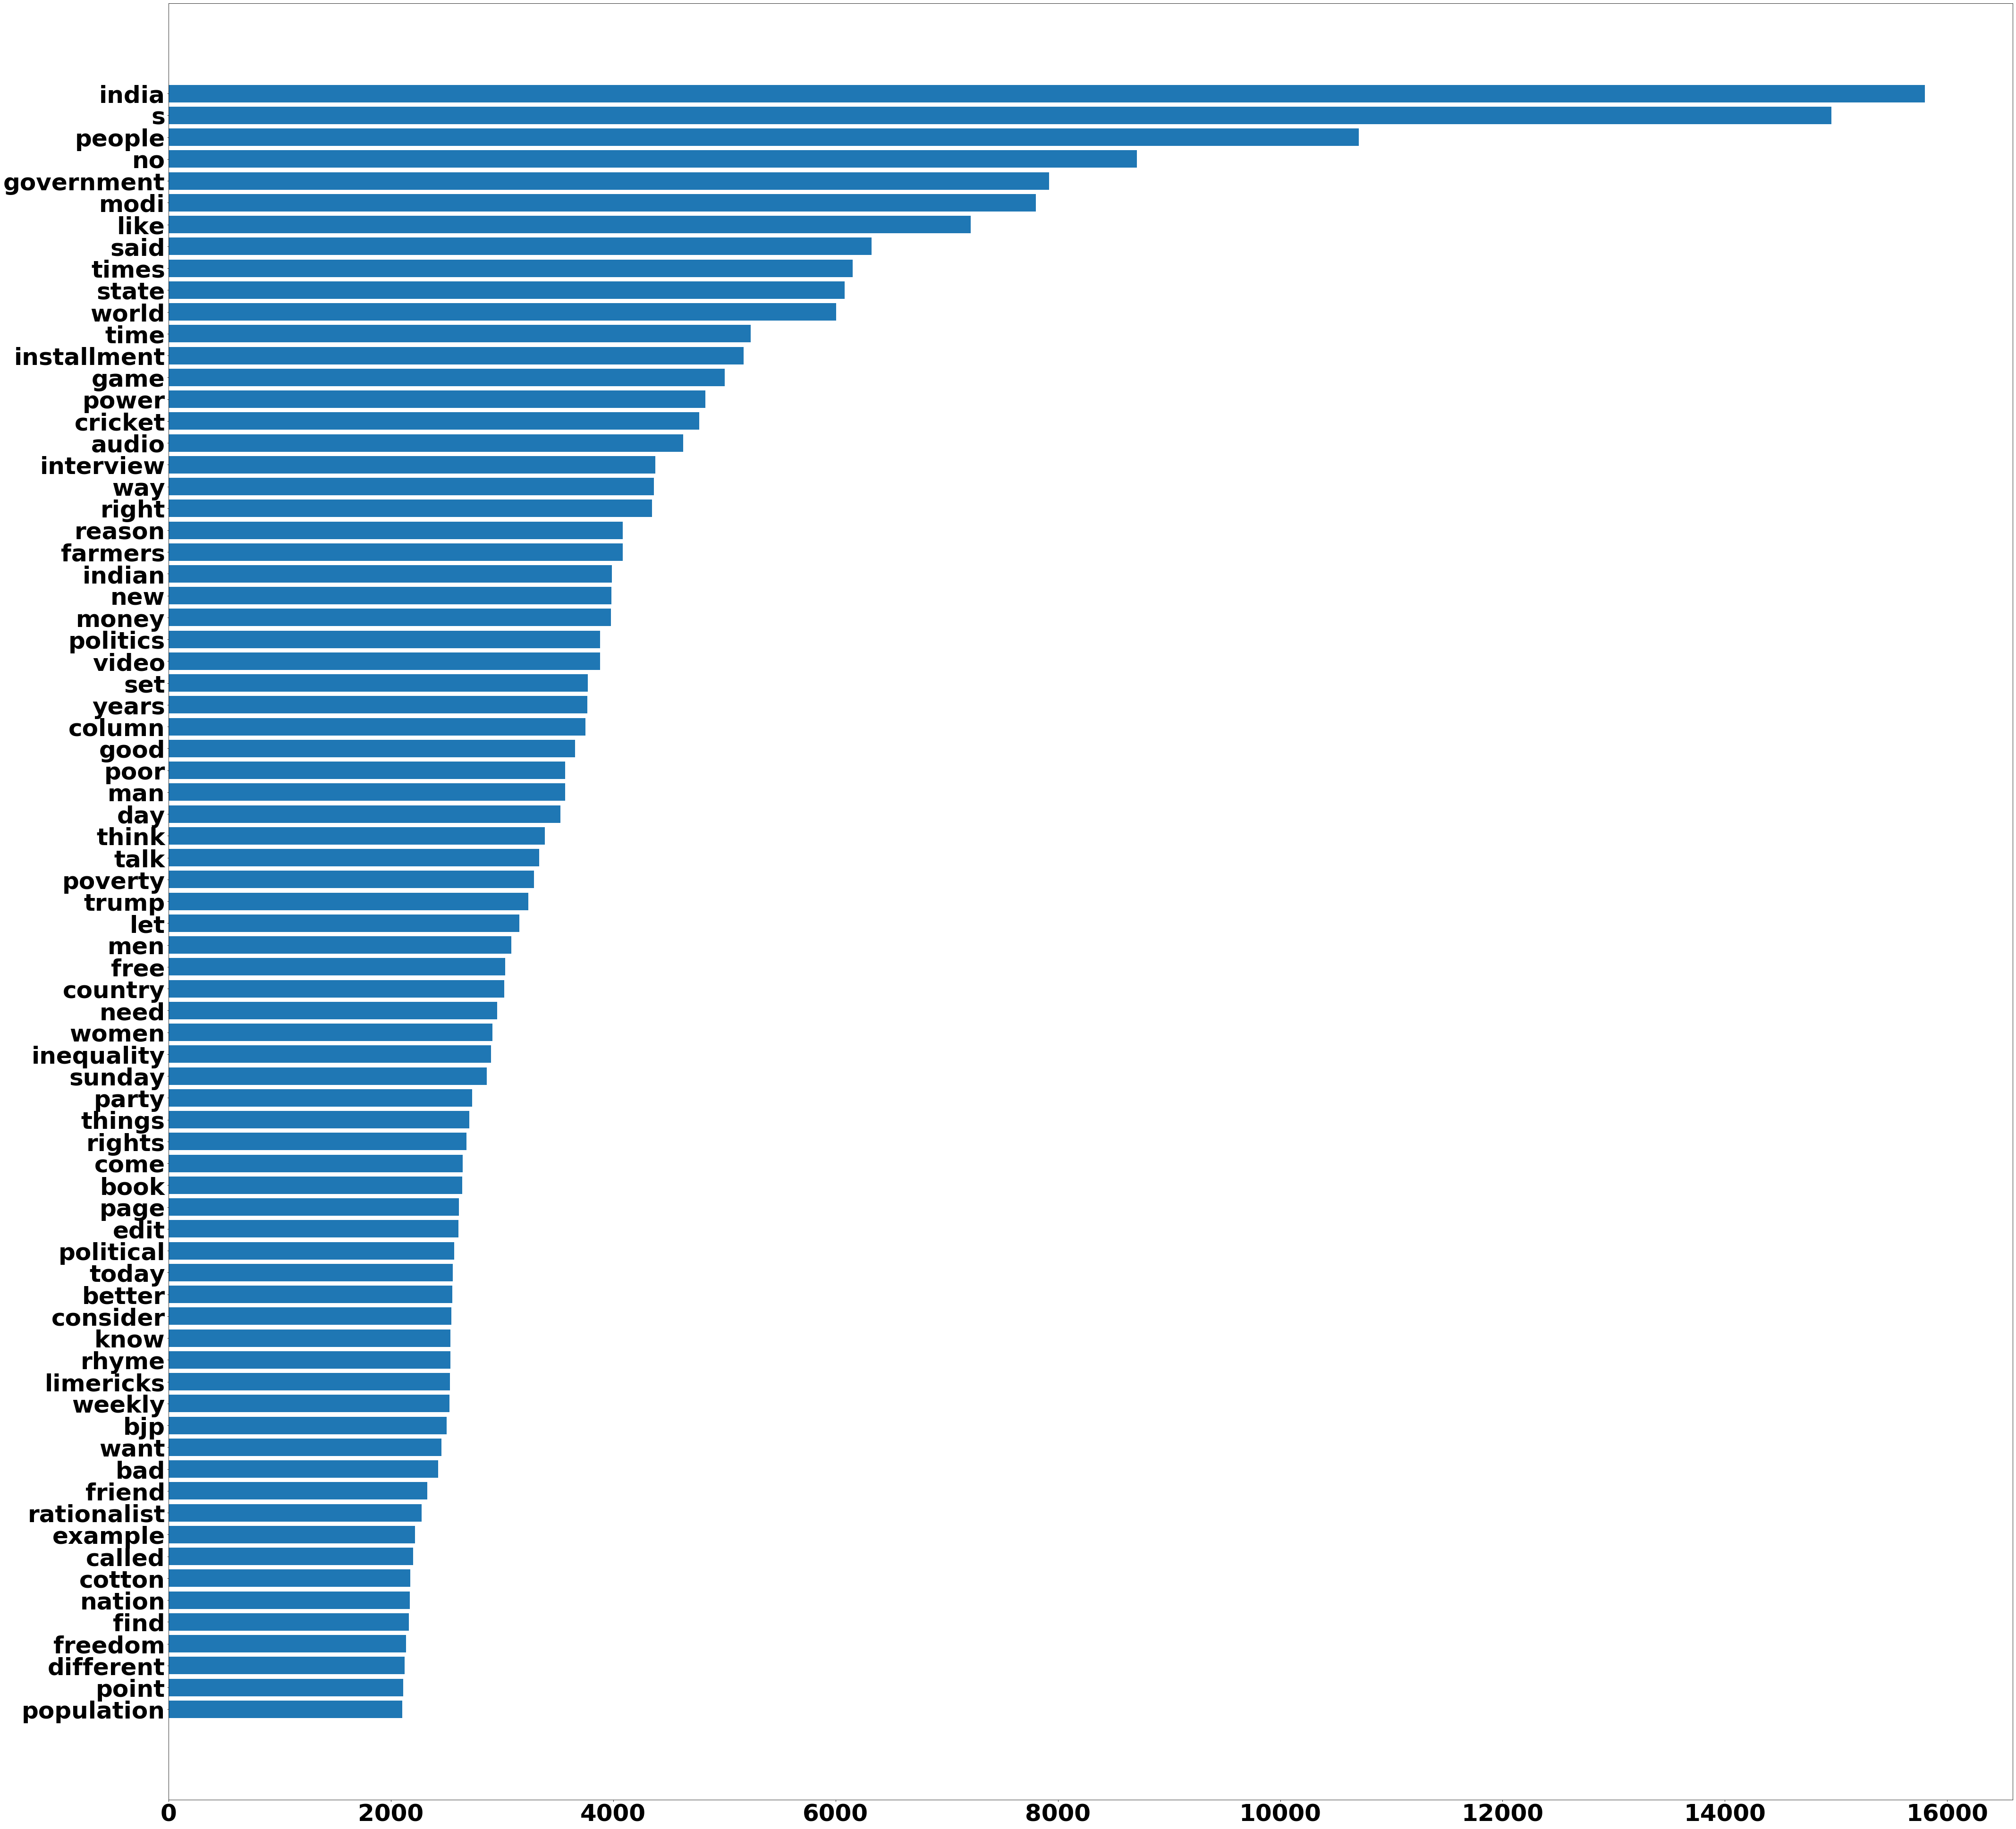

In [43]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 50}

plt.rc('font', **font)
fig = plt.figure(figsize=(70,70))
plt.barh(values[:75], counts[:75])
plt.gca().invert_yaxis()
plt.show()

#### Frequency plot of words in blogs with stopwords retained

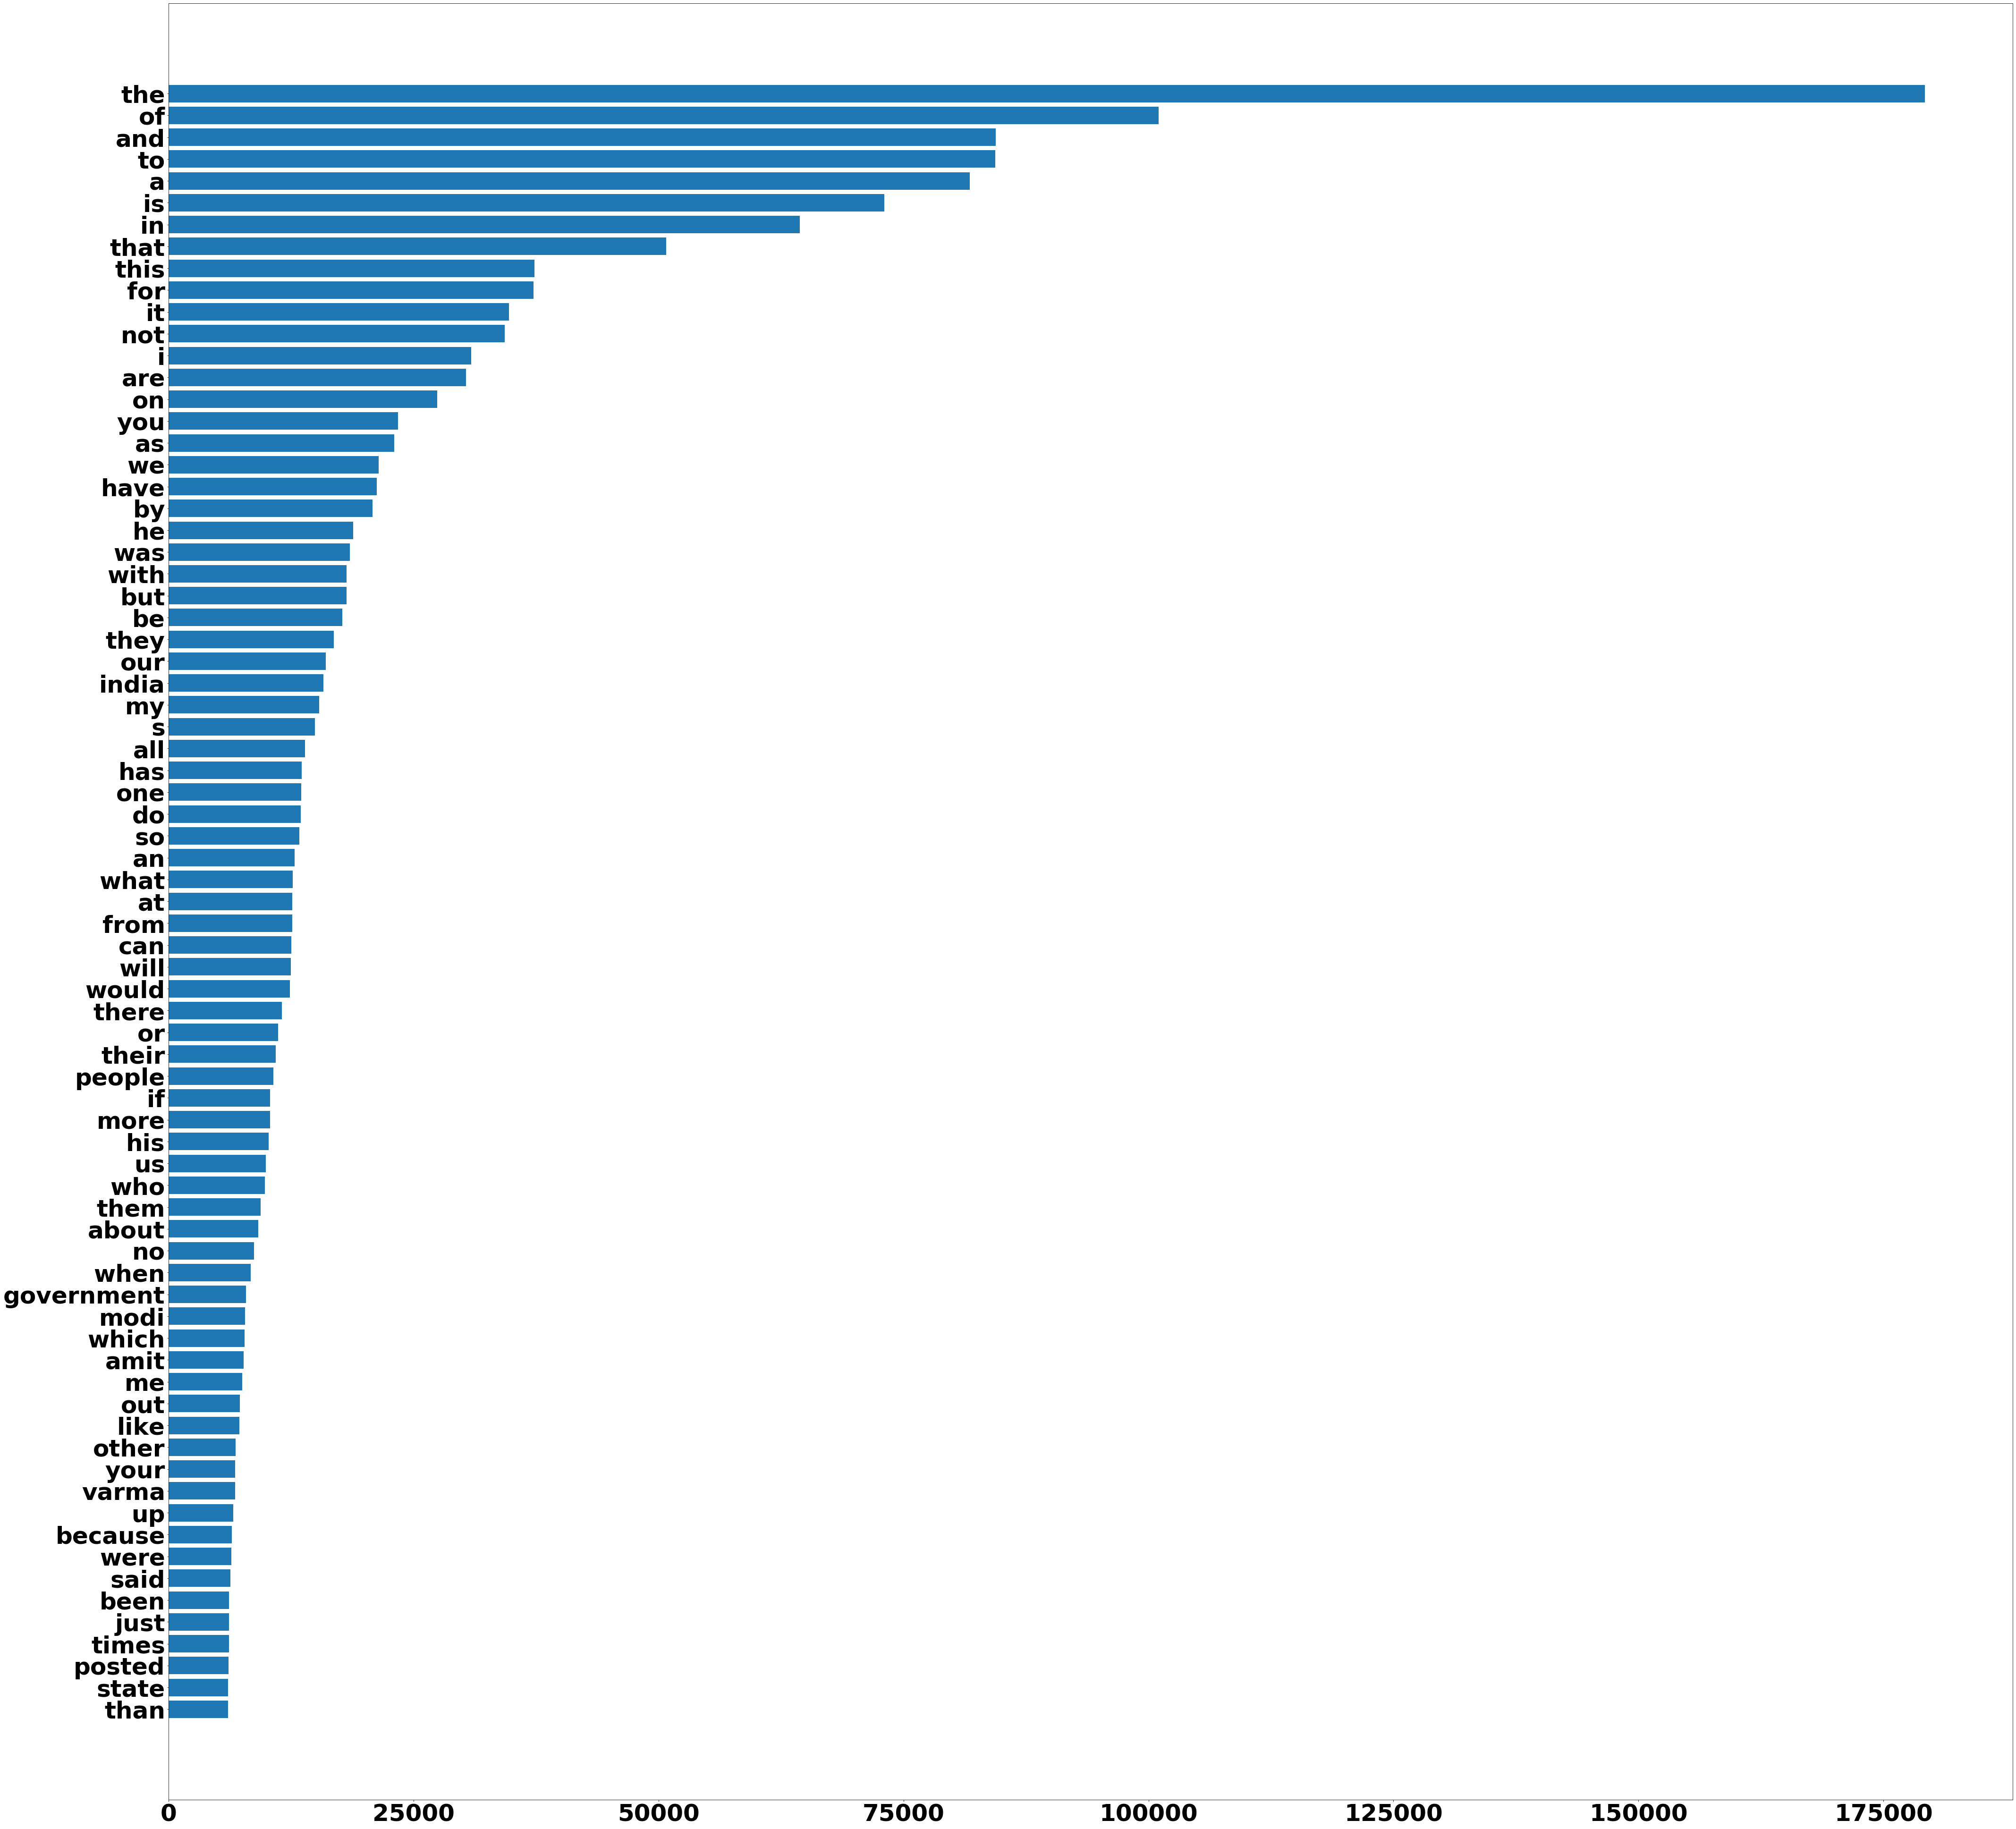

In [44]:
plt.rc('font', **font)
fig = plt.figure(figsize=(70,70))
plt.barh(all_values[:75], all_counts[:75])
plt.gca().invert_yaxis()
plt.show()

#### Observations from the Frequency Plots

1) The most occuring words present in both the graphs are quite different <br>
2) The most occuring words present in graph 1 (without stopwords) makes more sense.

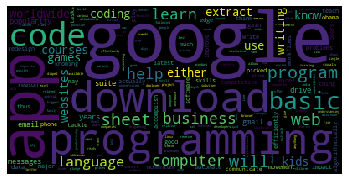

In [45]:
wordcloud = WordCloud().generate(data['text'][1])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

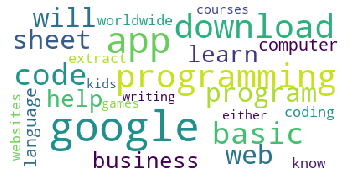

In [46]:
wordcloud = WordCloud(max_font_size=50, max_words=25, background_color="white").generate(data['text'][1])
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# TF-IDF

In [47]:
## tfidf vectorizer needs sentence and not token. Hence we need to combine all the tokens back to form a string

data['clean_text_stemmed'] = [' '.join(text) for text in data['clean_text_stemmed']]
data['clean_text_lemmatized'] = [' '.join(text) for text in data['clean_text_lemmatized']]
data['clean_text_lemmatized'][0]

'useful website internet smarter increase productivity help learn new skill incredibly useful website solve problem cool url easy memorize save trip google know useful website miss list let know send send personalize email multiple people google sheet download gmail message attachment google drive extract email address gmail message save google sheet receive file size google drive track price favorite amazon item google sheet create smart twitt bot write single line code build bespoke solution use capability feature google automate business process drive business productivity deploy big company university worldwide installation download know india google'

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=20000,
                                 min_df=0.2,
                                 use_idf=True, ngram_range=(1,4))

tfidf_matrix = tfidf_vectorizer.fit_transform(data['clean_text_lemmatized'])

print(tfidf_matrix.shape)

(495, 12849)


In [49]:
terms = tfidf_vectorizer.get_feature_names()
print(type(terms))
terms[:5]

<class 'list'>


['aadhaar',
 'ability',
 'ability manage',
 'ability manage party',
 'ability manage party translate']

# K-mean Clustering

### Fitting the elbow curve to identify right number of clusters/topics

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
import joblib
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=143)
    kmeanModel.fit(tfidf_matrix)
    Sum_of_squared_distances.append(kmeanModel.inertia_)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


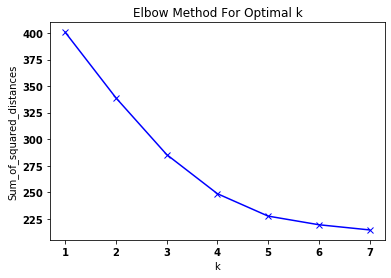

In [51]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [52]:
num_clusters = 4

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
centers = km.cluster_centers_
print(f"the cluster centers are {centers}")

joblib.dump(km,  'doc_cluster_best_K.pkl')

the cluster centers are [[0.00734303 0.00424912 0.00330994 ... 0.00330994 0.00330994 0.00330994]
 [0.00207412 0.00290342 0.00020436 ... 0.00020322 0.00020322 0.00020322]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


['doc_cluster_best_K.pkl']

### Getting the top words from each cluster

In [53]:
print(km.cluster_centers_)
print(km.cluster_centers_.shape)

[[0.00734303 0.00424912 0.00330994 ... 0.00330994 0.00330994 0.00330994]
 [0.00207412 0.00290342 0.00020436 ... 0.00020322 0.00020322 0.00020322]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(4, 12849)


#### argsort()
[1,2,3,5,4] -----> sort ---->[1,2,3,4,5]<br>
argsort------>[0,1,2,4,3] ---> index of the element in the original list

In [54]:
km.cluster_centers_.argsort()

array([[ 3375,  2719, 12809, ...,  7313,  8290,  5393],
       [ 7599,  2126,  2127, ...,   994,  5393, 11555],
       [    0,  8556,  8557, ..., 10630, 11046,  2154],
       [    0,  8512,  8513, ...,  3375,   309,  1768]])

In [55]:
## Reversing the list so that index of max element is in 0th index
km.cluster_centers_.argsort()[:,::-1]

array([[ 5393,  8290,  7313, ..., 12809,  2719,  3375],
       [11555,  5393,   994, ...,  2127,  2126,  7599],
       [ 2154, 11046, 10630, ...,  8557,  8556,     0],
       [ 1768,   309,  3375, ...,  8513,  8512,     0]])

In [56]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
for i in range(num_clusters):
    print("\n")
    print("Top words in Cluster-%d :" % i, end='')
    print("\n")
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print('%s' % terms[ind].split(' '), end=',')

Top terms per cluster:


Top words in Cluster-0 :

['india'],['people'],['modi'],['government'],['farmer'],['state'],

Top words in Cluster-1 :

['time'],['india'],['blog'],['say'],['know'],['like'],

Top words in Cluster-2 :

['conversation'],['support'],['sort'],['brief'],['fascinate'],['smile'],

Top words in Cluster-3 :

['color'],['anonymous'],['essence'],['spirit'],['sex'],['mate'],

In [57]:
data['cluster_group'] = clusters
pd.DataFrame(data).head(6)

,index,Author,title,link,text,word_count,clean_text_stemmed,clean_text_lemmatized,text_stemmed,text_lemmatized,cluster_group
0,0,Amit Agarwal,Most Useful Websites,https://www.labnol.org/internet/101-useful-web...,here are the most useful websites on the inter...,184,use websit internet smarter increas product he...,useful website internet smarter increase produ...,"[here, are, the, most, use, websit, on, the, i...","[here, be, the, most, useful, website, on, the...",1
1,1,Amit Agarwal,Learn to Code,https://www.labnol.org/internet/learn-coding-o...,the learn to code movement has picked up momen...,483,learn code movement pick momentum worldwid act...,learn code movement pick momentum worldwide ac...,"[the, learn, to, code, movement, has, pick, up...","[the, learn, to, code, movement, have, pick, u...",1
2,2,Amit Agarwal,Voice Dictation,https://dictation.io/,use the magic of speech recognition to write e...,184,use magic speech recognit write email document...,use magic speech recognition write email docum...,"[use, the, magic, of, speech, recognit, to, wr...","[use, the, magic, of, speech, recognition, to,...",1
3,3,Amit Agarwal,The Best Mac Apps,https://www.labnol.org/software/essential-mac-...,whether you are a new mac user or seasoned vet...,260,new mac user season veteran look s collect dow...,new mac user seasoned veteran look s collectio...,"[whether, you, are, a, new, mac, user, or, sea...","[whether, -PRON-, be, a, new, mac, user, or, s...",1
4,4,Amit Agarwal,Sell your music online,https://www.labnol.org/internet/sell-music-onl...,it is now easier than ever before to sell your...,896,easier sell music worldwid audienc musician ch...,easy sell music worldwide audience musician ch...,"[it, is, now, easier, than, ever, befor, to, s...","[-PRON-, be, now, easy, than, ever, before, to...",1
5,5,Amit Agarwal,Mail Merge for Gmail,https://www.labnol.org/internet/personalized-m...,mail merge for gmail lets you easily send pers...,615,mail merg gmail let easili send person messag ...,mail merge gmail let easily send personalized ...,"[mail, merg, for, gmail, let, you, easili, sen...","[mail, merge, for, gmail, let, -PRON-, easily,...",1


In [58]:
data.keys()

dict_keys(['index', 'Author', 'title', 'link', 'text', 'word_count', 'clean_text_stemmed', 'clean_text_lemmatized', 'text_stemmed', 'text_lemmatized', 'cluster_group'])

In [59]:
cluster_df = pd.DataFrame(data)
cluster_df['cluster_group'].value_counts()

1    234
0    128
3     73
2     60
Name: cluster_group, dtype: int64

## Fetching the most frequent words among each cluster

Step 1) Tokenize the entire text <br>
Step 2) Group the tokenized text by cluster id (output is list of lists: [[],[],[]])<br>
Step 3) Unlist the array of lists for each cluster group using chain function from itertools

In [60]:
##Step 1
cluster_df['tokenized_text'] = [text.split(' ') for text in cluster_df['clean_text_lemmatized']]

In [61]:
##Step 2
grouped_text = cluster_df.groupby('cluster_group')['tokenized_text']

In [62]:
## Fetch entire tokenized text for specific group
grouped_text.get_group(0)

7      [category, date, book, friend, sancho, publish...
17     [category, date, novel, friend, sancho, stand,...
19     [category, date, novel, friend, sancho, stand,...
21     [category, date, novel, friend, sancho, stand,...
23     [category, date, novel, friend, sancho, stand,...
25     [category, date, novel, friend, sancho, stand,...
26     [category, date, novel, friend, sancho, stand,...
27     [category, date, novel, friend, sancho, stand,...
28     [category, date, novel, friend, sancho, stand,...
29     [category, date, novel, friend, sancho, stand,...
30     [category, date, novel, friend, sancho, stand,...
32     [category, date, novel, friend, sancho, stand,...
35     [category, date, novel, friend, sancho, stand,...
36     [category, date, novel, friend, sancho, stand,...
37     [category, date, novel, friend, sancho, stand,...
38     [category, date, novel, friend, sancho, stand,...
39     [category, date, novel, friend, sancho, stand,...
40     [category, date, novel, 

In [63]:
from itertools import chain
frequent_words_df = pd.DataFrame(columns={"values", "counts", "cluster_id"})

for num in range(num_clusters):
    values, counts = np.unique(list(chain.from_iterable(grouped_text.get_group(num))), return_counts=True)
    sorted_indices = np.argsort(-counts)
    frequent_words_df = frequent_words_df.append({"values":values[sorted_indices], "counts":counts[sorted_indices], "cluster_id": num}, ignore_index=True)
    
frequent_words_df.head()

,counts,cluster_id,values
0,"[13627, 11230, 9428, 8175, 8059, 7395, 7142, 6...",0,"[india, s, people, time, government, modi, no,..."
1,"[4631, 4082, 3833, 3640, 3220, 3039, 2346, 217...",1,"[audio, interview, video, s, time, talk, say, ..."
2,"[120, 120, 60, 60, 60, 60, 60, 60, 60, 60, 60,...",2,"[support, conversation, art, trifle, touch, so..."
3,"[83, 79, 76, 73, 73, 73, 73, 73, 73, 73, 73, 7...",3,"[life, love, offer, pursuit, stag, spirit, bee..."


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


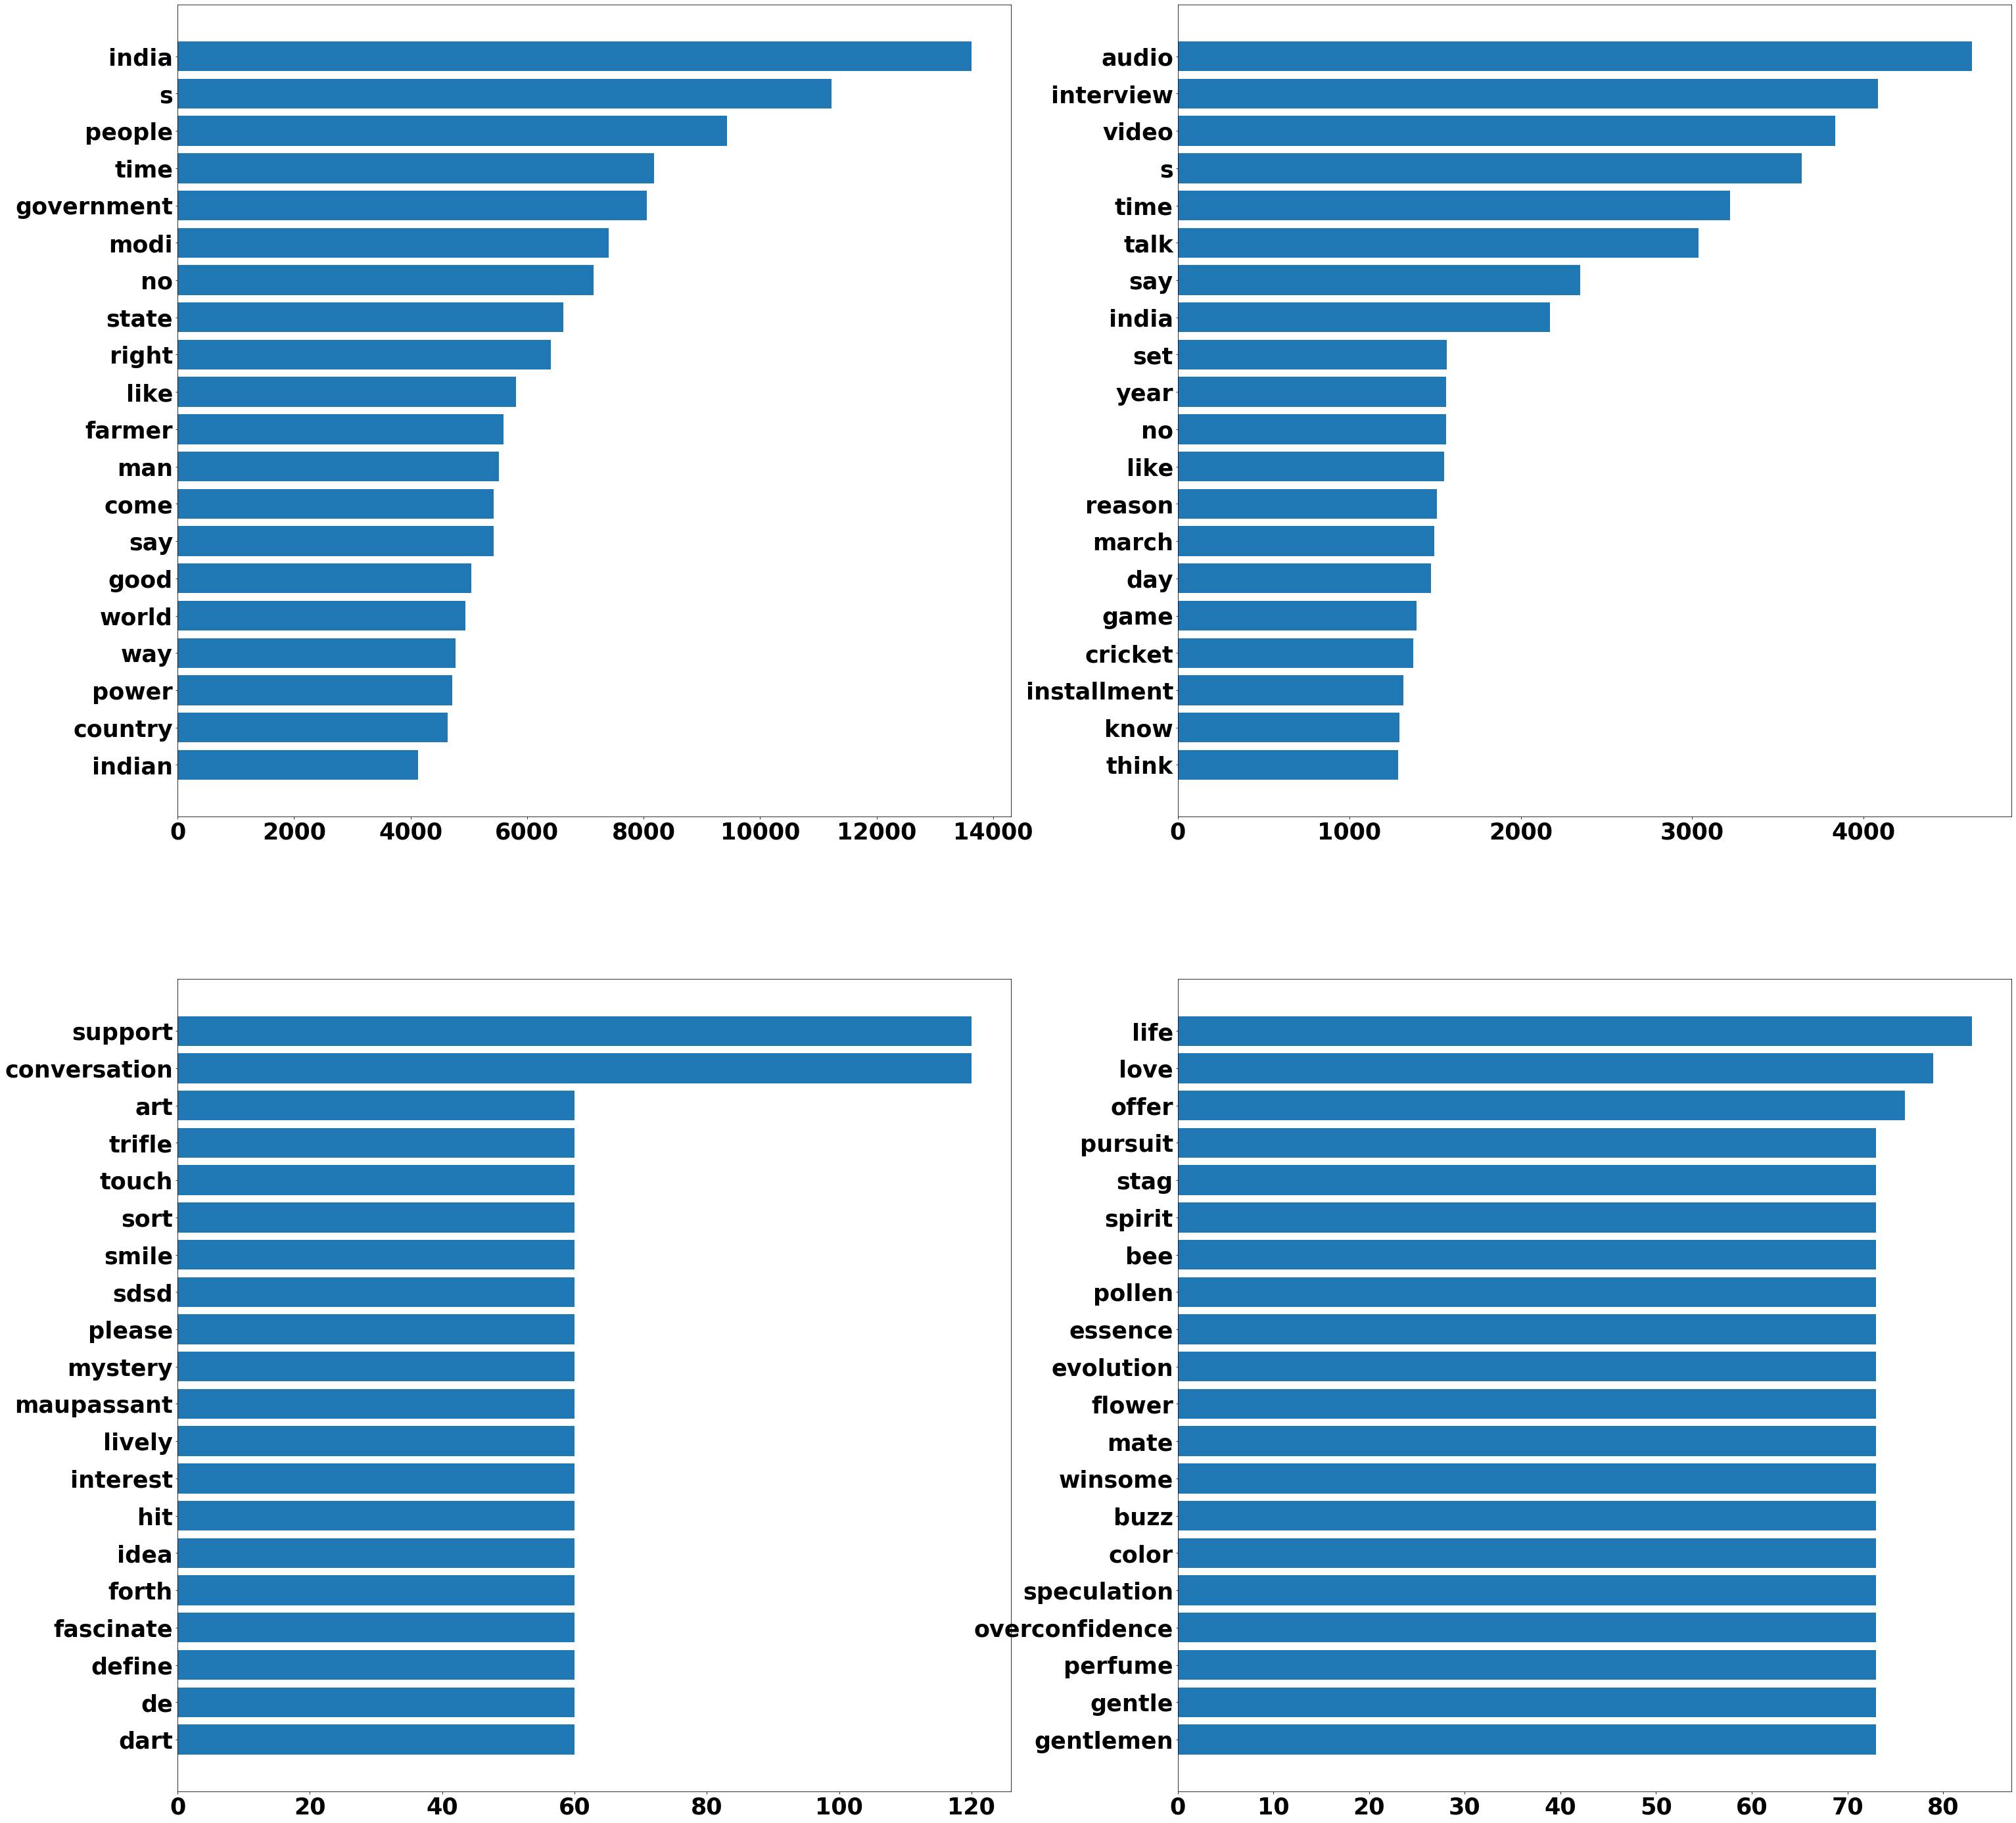

In [64]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 35}

plt.rc('font', **font)

fig = plt.figure(figsize=(50,50))
plt.subplot(2,2,1)
plt.barh(frequent_words_df.loc[0,'values'][:20], frequent_words_df.loc[0,'counts'][:20])
plt.gca().invert_yaxis()


plt.subplot(2,2,2)
plt.barh(frequent_words_df.loc[1,'values'][:20], frequent_words_df.loc[1,'counts'][:20])
plt.gca().invert_yaxis()

plt.subplot(2,2,3)
plt.barh(frequent_words_df.loc[2,'values'][:20], frequent_words_df.loc[2,'counts'][:20])
plt.gca().invert_yaxis()

plt.subplot(2,2,4)
plt.barh(frequent_words_df.loc[3,'values'][:20], frequent_words_df.loc[3,'counts'][:20])
plt.gca().invert_yaxis()

### Truncated SVD (Latent Semantic Analysis - LSA) using Scikitlearn

<img src="SVD1.png">

In this case, U ∈ ℝ^(m ⨉ t) emerges as our document-topic matrix, and V ∈ ℝ^(n ⨉ t) becomes our term-topic matrix. In both U and V, the columns correspond to one of our t topics. 

In U, rows represent document vectors expressed in terms of topics; in V, rows represent term vectors expressed in terms of topics.

In [65]:
from sklearn.decomposition import TruncatedSVD

n_components = 26

svd_model = TruncatedSVD(n_components=n_components, algorithm='randomized',n_iter=20,random_state=143)

svd_matrix = svd_model.fit(tfidf_matrix)

svd_matrix

TruncatedSVD(algorithm='randomized', n_components=26, n_iter=20,
             random_state=143, tol=0.0)

In [66]:
print(f"Explained Variance Ratio : {svd_matrix.explained_variance_ratio_}") 
print(f"\nTotal Explained Variance : {round(svd_matrix.explained_variance_ratio_.sum() * 100, 2)} %")
print(f"\nThe singular values are {svd_matrix.singular_values_}")

Explained Variance Ratio : [0.13122345 0.13386243 0.10980023 0.07346109 0.04280925 0.02855378
 0.0231052  0.0196378  0.01552996 0.01463955 0.01310632 0.01080107
 0.01047551 0.0102397  0.0093155  0.00896852 0.00865231 0.00807616
 0.00753675 0.00742928 0.00684864 0.00663739 0.00645667 0.00619202
 0.00612229 0.00595126]

Total Explained Variance : 72.54 %

The singular values are [11.47314824  7.75796623  7.04480003  5.47099888  4.28418011  3.38512767
  3.04765826  2.83158917  2.49608952  2.42239417  2.29454527  2.08243038
  2.05161945  2.0284537   1.93522532  1.89665998  1.86379293  1.7991941
  1.73815774  1.7259404   1.65753646  1.63205634  1.60880071  1.57542119
  1.56780301  1.54447502]


### Picking the few most important words in each topic

The components of svd_model are our topics and we can access them using svdmodel.components.<br>
let's print a few most important words in each of the 4 topics and see how our model has done.

In [68]:
for i, comp in enumerate(svd_model.components_):
    print(f"The component is {comp} and shape is {comp.shape}")
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:6]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(f"{t[0]} -- {t[1]}")
    print(" ")

The component is [0.00810678 0.00555292 0.00303877 ... 0.00303909 0.00303909 0.00303909] and shape is (12849,)
Topic 0: 
india -- 0.2461157811840484
people -- 0.16423195230468948
time -- 0.1595504662737821
government -- 0.14365224126954207
modi -- 0.14314519035610834
farmer -- 0.12694501792684262
 
The component is [-0.00090208 -0.00015676 -0.00032342 ... -0.00033051 -0.00033051
 -0.00033051] and shape is (12849,)
Topic 1: 
conversation -- 0.46488751333888206
support -- 0.38690831457879415
sort -- 0.2712261822540514
brief -- 0.24889963219586028
fascinate -- 0.24014729195497708
smile -- 0.23040271727705633
 
The component is [-0.00151132  0.00017218 -0.0005288  ... -0.00052538 -0.00052538
 -0.00052538] and shape is (12849,)
Topic 2: 
anonymous -- 0.3553631606626123
color -- 0.35370556442165635
essence -- 0.33704009350879915
spirit -- 0.33304696395945393
sex -- 0.32902593334713515
mate -- 0.2971633319595198
 
The component is [ 0.01389102 -0.00354844 -0.00204378 ... -0.00201906 -0.002019

### Tagging each document with a topic

In [69]:
doc_topic_matrix = svd_matrix.transform(tfidf_matrix)
print("\nDoc Topic Matrix: \n",doc_topic_matrix)
svd_categories = np.argmax(doc_topic_matrix, axis=1)
print("\nSVD Categories: \n",svd_categories)


Doc Topic Matrix: 
 [[ 0.11478527  0.00976446  0.00164297 ... -0.03930809 -0.02169542
  -0.0003745 ]
 [ 0.17913548  0.01233889  0.01798791 ...  0.02424134 -0.03255911
  -0.0147536 ]
 [ 0.09431819  0.09974783  0.00183867 ...  0.09855984 -0.03129297
   0.14726185]
 ...
 [ 0.22237944 -0.0030853   0.01579916 ...  0.00964373  0.03962397
   0.08357604]
 [ 0.11524656  0.0092812   0.00327574 ... -0.03675916 -0.0163928
   0.00098804]
 [ 0.14909663  0.02804958  0.00420053 ...  0.07135733  0.02092589
  -0.14719718]]

SVD Categories: 
 [ 8  8  8  8  7  8 22  0  4  0  4  4  0  0  0  0  6  0  6  0  0  0 16  0
 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 23 23 19  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3 16  0  0  0  0
  0  0  0  0  0  0  0  0  0  3  3  3  0  0  3  3 16  0  0  0  0  0 19 16
  0  0  0  0  0  3  3  3  0  3  3  0  0  9  9  0  0  0  0  0  0  0  0  6
  6  4  0  6  0  0  0 11  4  0 

In [70]:
data['SVD_group'] = svd_categories
pd.DataFrame(data).head(6)

,index,Author,title,link,text,word_count,clean_text_stemmed,clean_text_lemmatized,text_stemmed,text_lemmatized,cluster_group,SVD_group
0,0,Amit Agarwal,Most Useful Websites,https://www.labnol.org/internet/101-useful-web...,here are the most useful websites on the inter...,184,use websit internet smarter increas product he...,useful website internet smarter increase produ...,"[here, are, the, most, use, websit, on, the, i...","[here, be, the, most, useful, website, on, the...",1,8
1,1,Amit Agarwal,Learn to Code,https://www.labnol.org/internet/learn-coding-o...,the learn to code movement has picked up momen...,483,learn code movement pick momentum worldwid act...,learn code movement pick momentum worldwide ac...,"[the, learn, to, code, movement, has, pick, up...","[the, learn, to, code, movement, have, pick, u...",1,8
2,2,Amit Agarwal,Voice Dictation,https://dictation.io/,use the magic of speech recognition to write e...,184,use magic speech recognit write email document...,use magic speech recognition write email docum...,"[use, the, magic, of, speech, recognit, to, wr...","[use, the, magic, of, speech, recognition, to,...",1,8
3,3,Amit Agarwal,The Best Mac Apps,https://www.labnol.org/software/essential-mac-...,whether you are a new mac user or seasoned vet...,260,new mac user season veteran look s collect dow...,new mac user seasoned veteran look s collectio...,"[whether, you, are, a, new, mac, user, or, sea...","[whether, -PRON-, be, a, new, mac, user, or, s...",1,8
4,4,Amit Agarwal,Sell your music online,https://www.labnol.org/internet/sell-music-onl...,it is now easier than ever before to sell your...,896,easier sell music worldwid audienc musician ch...,easy sell music worldwide audience musician ch...,"[it, is, now, easier, than, ever, befor, to, s...","[-PRON-, be, now, easy, than, ever, before, to...",1,7
5,5,Amit Agarwal,Mail Merge for Gmail,https://www.labnol.org/internet/personalized-m...,mail merge for gmail lets you easily send pers...,615,mail merg gmail let easili send person messag ...,mail merge gmail let easily send personalized ...,"[mail, merg, for, gmail, let, you, easili, sen...","[mail, merge, for, gmail, let, -PRON-, easily,...",1,8


#### Clustering the Document-Topic matrix

In [71]:
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=143)
    kmeanModel.fit(doc_topic_matrix)
    Sum_of_squared_distances.append(kmeanModel.inertia_)

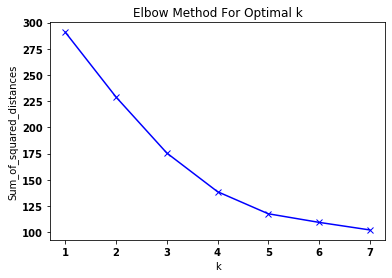

In [72]:


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [73]:
num_clusters = 4

km = KMeans(n_clusters=num_clusters)

km.fit(doc_topic_matrix)

clusters = km.labels_.tolist()

centers = km.cluster_centers_
print(f"the cluster centers are {centers}")

joblib.dump(km,  'doc_topic_cluster_best_K.pkl')

the cluster centers are [[ 1.05645827e-01  2.93068478e-02  7.98041072e-01  3.65004506e-03
  -3.39051108e-02  1.21715785e-02 -6.83965096e-03 -7.51595775e-03
   9.91102552e-03 -9.43606652e-03  3.54278818e-02 -3.00796472e-03
   1.60198528e-02  7.66339291e-04 -5.18796132e-03  5.36526202e-03
  -3.29169495e-03 -6.30716663e-03  1.44732806e-03  7.19992246e-03
   1.29103503e-02  1.36520203e-02  1.25727697e-03 -9.79240417e-03
  -1.91505271e-02  5.51919688e-04]
 [ 9.07988917e-01 -3.95177148e-02 -5.52982770e-02 -9.23703067e-02
  -1.05085025e-01  1.95677293e-02 -1.06600937e-02 -3.37322127e-03
  -1.15412762e-03 -9.56491714e-03 -6.55884067e-03 -3.08462604e-03
   6.26430559e-04 -3.28909529e-03  6.01195234e-03 -3.77633919e-03
  -5.44213365e-03 -8.56528673e-04  5.35256330e-03 -2.09938380e-03
  -1.65102679e-03  1.39120498e-04 -4.99151709e-03 -3.40757979e-04
  -1.74486741e-03  2.00100785e-03]
 [ 7.79057903e-02  9.96025000e-01 -3.44477253e-02  8.81933546e-03
  -1.59566100e-02  1.38611354e-02  6.71197637e-0

['doc_topic_cluster_best_K.pkl']

In [76]:
clusters = km.labels_.tolist()
data['doc_topic_cluster_group'] = clusters

In [77]:
doc_cluster_df = pd.DataFrame(data)
doc_cluster_df['doc_topic_cluster_group'].value_counts()

3    238
1    128
0     69
2     60
Name: doc_topic_cluster_group, dtype: int64

#### Fetching the most frequent words among each cluster

Step 1) Tokenize the entire text <br>
Step 2) Group the tokenized text by cluster id (output is list of lists: [[],[],[]])<br>
Step 3) Unlist the array of lists for each cluster group using chain function from itertools

In [78]:
##Step 1
doc_cluster_df['tokenized_text'] = [text.split(' ') for text in doc_cluster_df['clean_text_lemmatized']]

In [79]:
##Step 2
grouped_text = doc_cluster_df.groupby('doc_topic_cluster_group')['tokenized_text']

In [80]:
frequent_words_df = pd.DataFrame(columns={"values", "counts", "cluster_id"})

In [81]:
for num in range(num_clusters):
    values, counts = np.unique(list(chain.from_iterable(grouped_text.get_group(num))), return_counts=True)
    sorted_indices = np.argsort(-counts)
    frequent_words_df = frequent_words_df.append({"values":values[sorted_indices], "counts":counts[sorted_indices], "cluster_id": num}, ignore_index=True)

In [82]:
frequent_words_df.head()

,counts,cluster_id,values
0,"[79, 72, 69, 69, 69, 69, 69, 69, 69, 69, 69, 6...",0,"[life, offer, gentlemen, buzz, howl, color, sp..."
1,"[13627, 11230, 9428, 8175, 8059, 7395, 7142, 6...",1,"[india, s, people, time, government, modi, no,..."
2,"[120, 120, 60, 60, 60, 60, 60, 60, 60, 60, 60,...",2,"[support, conversation, art, trifle, touch, so..."
3,"[4631, 4082, 3833, 3642, 3220, 3039, 2348, 217...",3,"[audio, interview, video, s, time, talk, say, ..."


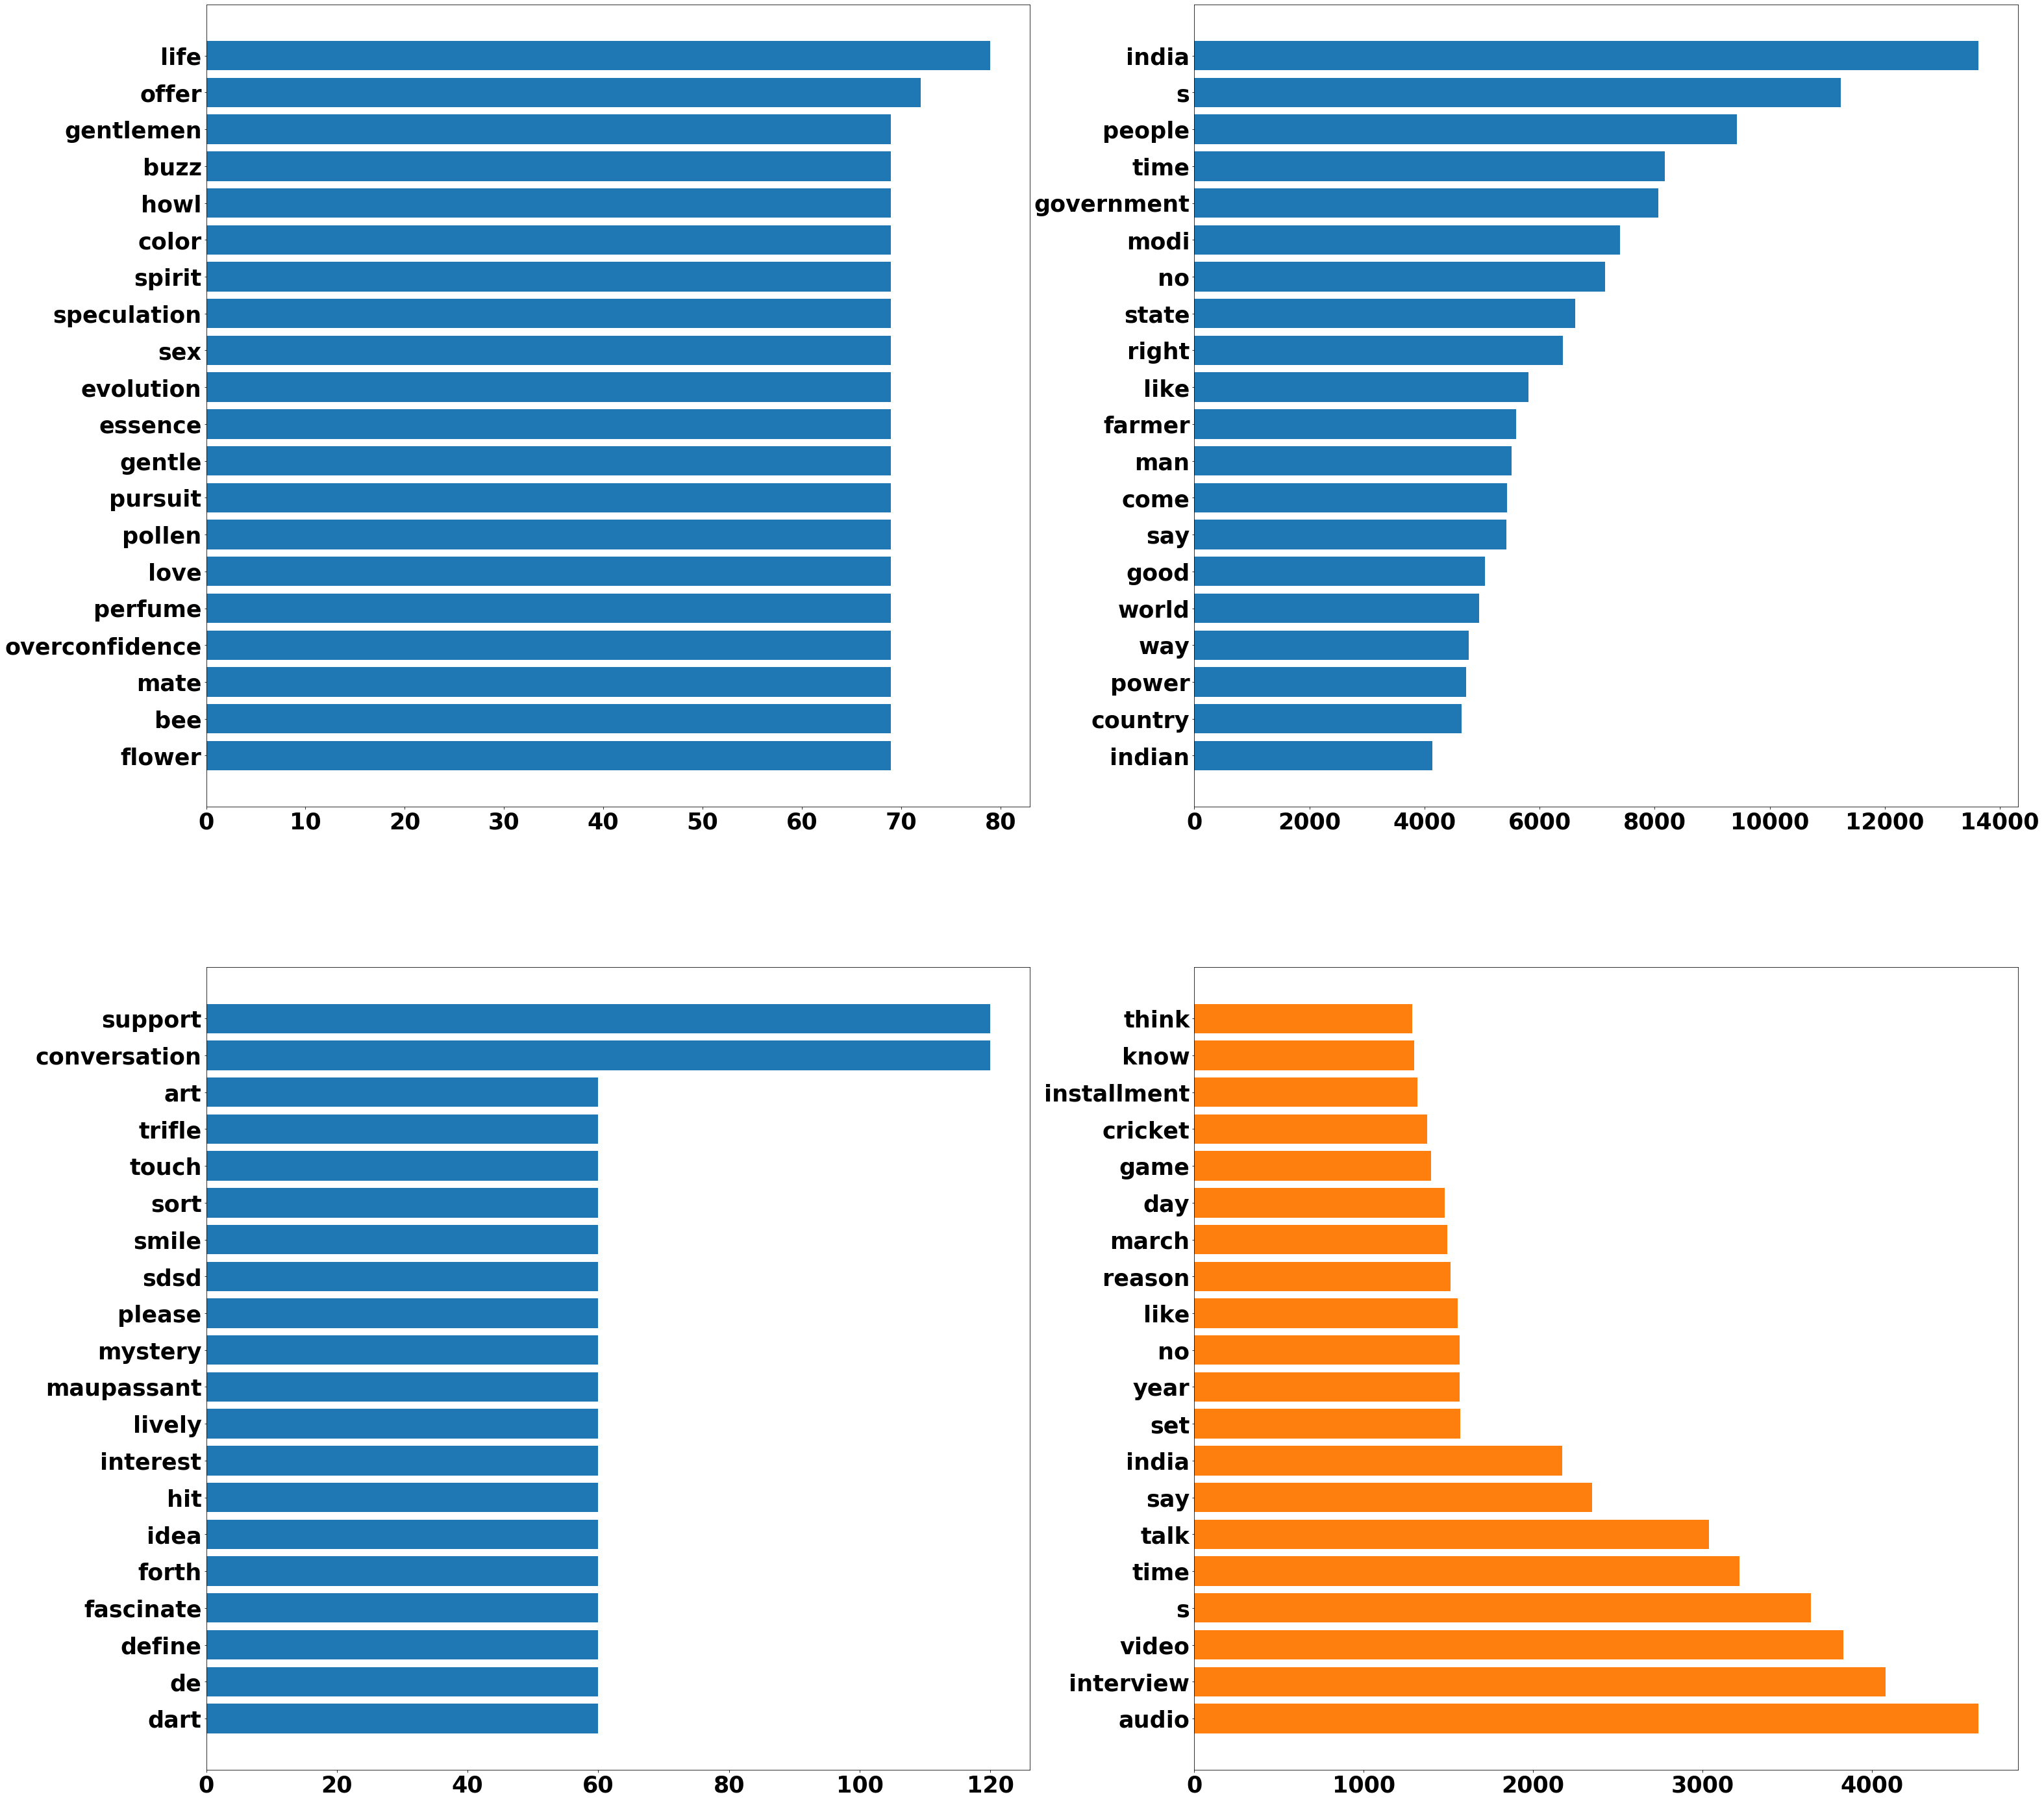

In [83]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 35}

plt.rc('font', **font)

fig = plt.figure(figsize=(50,50))
plt.subplot(2,2,1)
plt.barh(frequent_words_df.loc[0,'values'][:20], frequent_words_df.loc[0,'counts'][:20])
plt.gca().invert_yaxis()


plt.subplot(2,2,2)
plt.barh(frequent_words_df.loc[1,'values'][:20], frequent_words_df.loc[1,'counts'][:20])
plt.gca().invert_yaxis()

plt.subplot(2,2,3)
plt.barh(frequent_words_df.loc[2,'values'][:20], frequent_words_df.loc[2,'counts'][:20])
plt.gca().invert_yaxis()
plt.subplot(2,2,4)
plt.barh(frequent_words_df.loc[3,'values'][:20], frequent_words_df.loc[3,'counts'][:20])
plt.gca().invert_yaxis()

plt.subplot(2,2,4)
plt.barh(frequent_words_df.loc[3,'values'][:20], frequent_words_df.loc[3,'counts'][:20])
plt.gca().invert_yaxis()